### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.shape

(12684, 26)

In [5]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

* 'car' feature has 99.99% of values missing so this feature can be dropped from data set as even if we populate the missing values, it won't help in predictive analysis due to such a large percentage of values missing.
* Other missing values can be populated using Imputation Mode method.

This activity was executed down below at appropriate step in the independent investigation.

4. What proportion of the total observations chose to accept the coupon? 



56.843 %


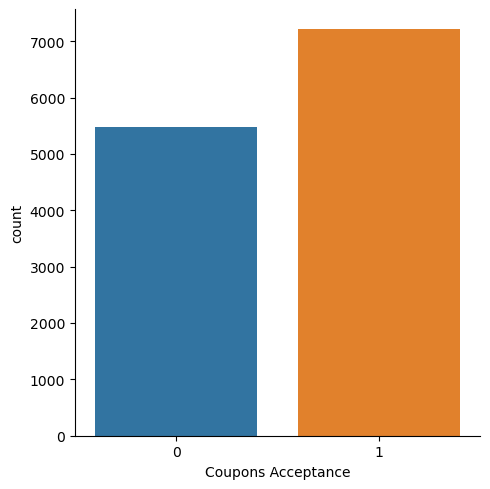

In [6]:
# Proportion of total accepted coupons
print(round((data.query('Y == 1')['Y'].count() / data.shape[0])*100,3), '%')
fig0 = sns.catplot(data, x = 'Y', kind = 'count')
fig0.set_xlabels('Coupons Acceptance')

5. Use a bar plot to visualize the `coupon` column.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

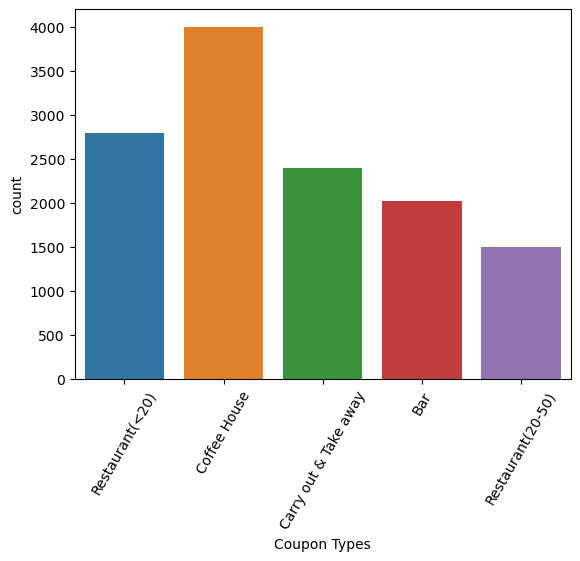

In [7]:
# Plot the coupon feature for visualization
fig01 = sns.countplot(data, x = 'coupon')
fig01.set_xlabel('Coupon Types')
plt.xticks(rotation=60)

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

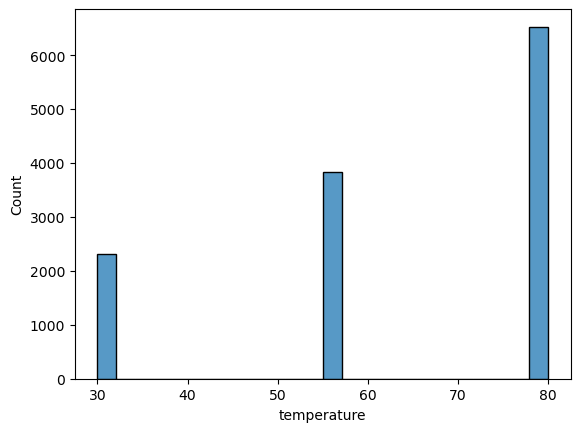

In [8]:
# Histogram of temperature feature
sns.histplot(data, x = 'temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [9]:
# Create new DataFrame that contains just Bar coupons
data_bar_cpn = data.query("coupon == 'Bar'")

2. What proportion of bar coupons were accepted?


In [10]:
# Proportion of bar coupons accepted against total bar coupons
print(round((data_bar_cpn.query('Y == 1').shape[0] / data_bar_cpn.shape[0])*100,3),'%')


41.001 %


Text(0.5, 0, 'Coupons Acceptance')

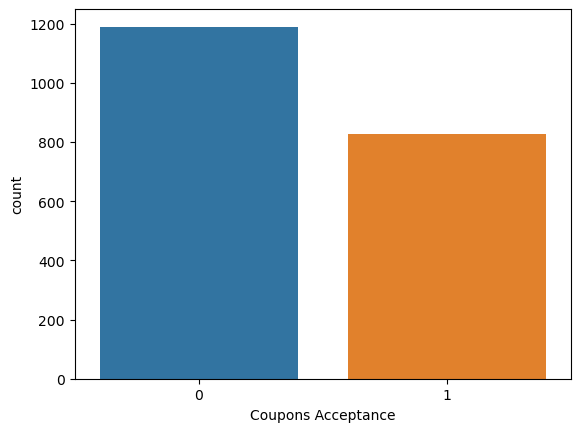

In [11]:
# Use Countplot to visualize the Coupons Acceptance
fig02 = sns.countplot(data_bar_cpn, x = 'Y')
fig02.set_xlabel('Coupons Acceptance')

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Fewer than 3: 33.019%
More than 3 : 7.982%


Text(0.5, 0, 'Coupons Acceptance')

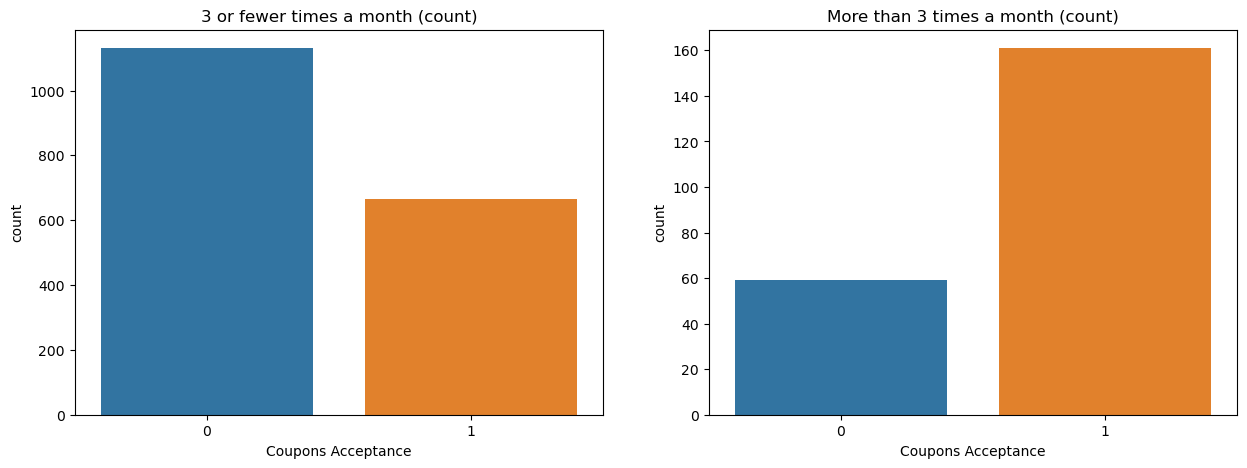

In [12]:
# Query the data frame against given conditions and plot to visualize them
# Define the lists for filtering the data
fewerthan3 = ['less1', '1~3', 'never']
fewerthan3_rate = data_bar_cpn.query('Y == 1 and Bar in @fewerthan3').shape[0] / data_bar_cpn.shape[0]
morethan3_rate = data_bar_cpn.query('Y == 1 and Bar not in @fewerthan3').shape[0] / data_bar_cpn.shape[0]
print("{}: {}{}".format('Fewer than 3', round(fewerthan3_rate*100,3), '%'))
print("{} : {}{}".format('More than 3', round(morethan3_rate*100,3), '%'))

#Use subplot to visualize the use case together
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data_bar_cpn.query('Bar in @fewerthan3'), x = 'Y',ax=axes[0])
sns.countplot(data_bar_cpn.query('Bar not in @fewerthan3'), x = 'Y',ax=axes[1])
axes[0].set_title('3 or fewer times a month (count)')
axes[1].set_title('More than 3 times a month (count)')
axes[0].set_xlabel('Coupons Acceptance')
axes[1].set_xlabel('Coupons Acceptance')


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


More than once a month and over 25yrs of age: 0.14476945959345563
Rest of the Others: 0.06395637084779375


Text(0.5, 0, 'Coupons Acceptance')

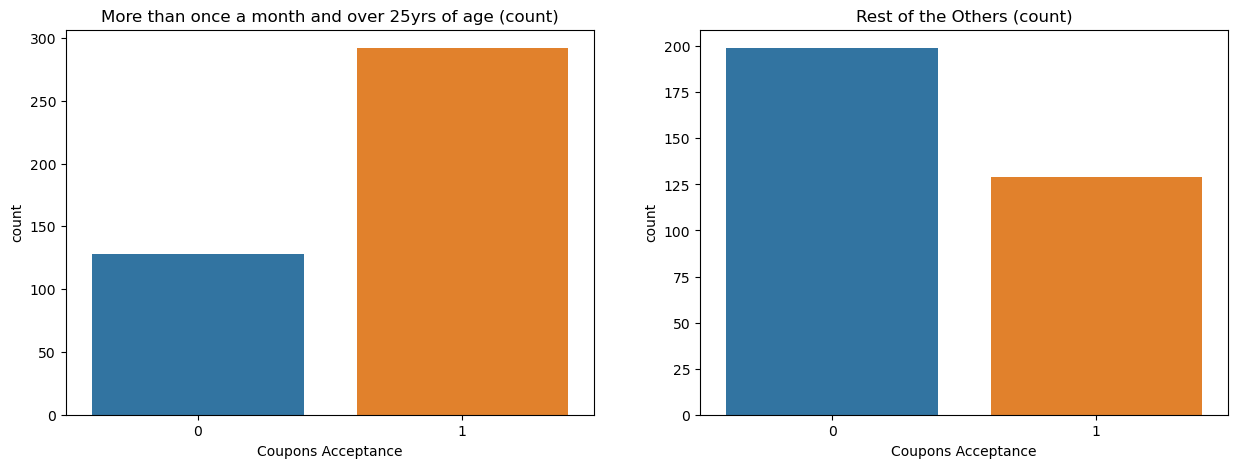

In [13]:
# Query the data frame against given conditions and plot to visualize them
# Define the lists for filtering the data
morethan1 = ['1~3', '4~8', 'gt8']
ageover25 = ['46', '26', '31', '41', '50plus', '36']
rate1 = data_bar_cpn.query('Y == 1 and Bar in @morethan1 and age in @ageover25').shape[0] / data_bar_cpn.shape[0]
rate2 = data_bar_cpn.query('Y == 1 and Bar not in @morethan1 and age not in @ageover25').shape[0] / data_bar_cpn.shape[0]
print("{}: {}".format('More than once a month and over 25yrs of age', rate1))
print("{}: {}".format('Rest of the Others', rate2))

#Use subplot to visualize the use case together
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data_bar_cpn.query('Bar in @morethan1 and age in @ageover25'), x = 'Y',ax=axes[0])
sns.countplot(data_bar_cpn.query('Bar not in @morethan1 and age not in @ageover25'), x = 'Y',ax=axes[1])
axes[0].set_title('More than once a month and over 25yrs of age (count)')
axes[1].set_title('Rest of the Others (count)')
axes[0].set_xlabel('Coupons Acceptance')
axes[1].set_xlabel('Coupons Acceptance')


#### Observations:
* Customers who were over 25 and visited a Bar more than once a month had a higher acceptance rate than others.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


More than once a month, passanger not Kid... 6.941 %
Rest of the Others                           0.198 %


Text(0.5, 0, 'Coupons Acceptance')

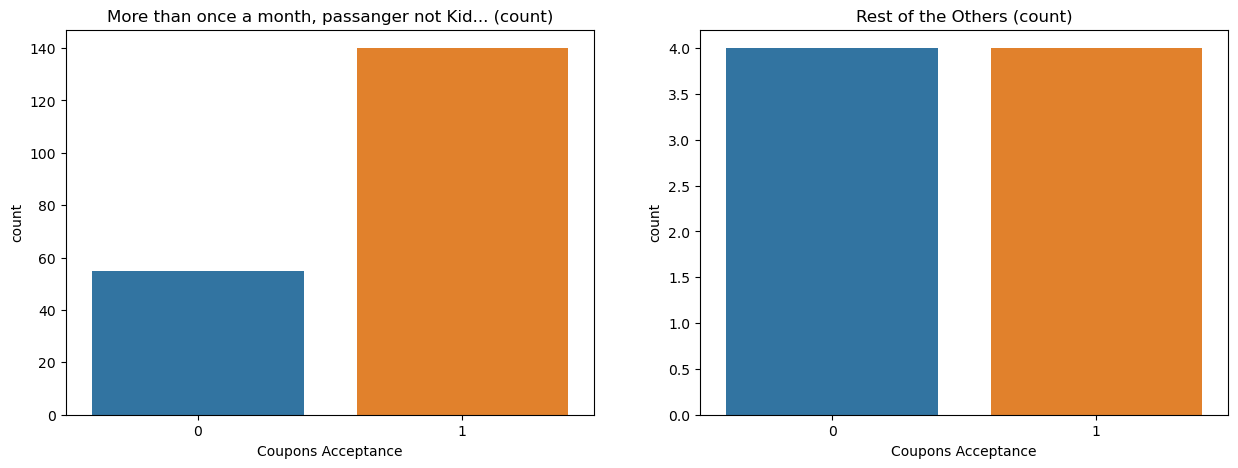

In [14]:
# Query the data frame against given conditions and plot to visualize them
# Define the lists for filtering the data
morethan1 = ['1~3', '4~8', 'gt8']
occulist = ['Farming Fishing & Forestry']
passangerlist = ['Friend(s)', 'Partner']
rate3 = data_bar_cpn.query('Y == 1 and Bar in @morethan1 and passanger in @passangerlist and occupation not in @occulist').shape[0] / data_bar_cpn.shape[0]
rate4 = data_bar_cpn.query('Y == 1 and Bar not in @morethan1 and passanger not in @passangerlist and occupation in @occulist').shape[0] / data_bar_cpn.shape[0]
print('More than once a month, passanger not Kid...', round(rate3*100,3),'%')
print('Rest of the Others                          ', round(rate4*100,3),'%')

#Use subplot to visualize the use case together
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data_bar_cpn.query('Bar in @morethan1 and passanger in @passangerlist and occupation not in @occulist'), x = 'Y',ax=axes[0])
sns.countplot(data_bar_cpn.query('Bar not in @morethan1 and passanger not in @passangerlist and occupation in @occulist'), x = 'Y',ax=axes[1])
axes[0].set_title('More than once a month, passanger not Kid... (count)')
axes[1].set_title('Rest of the Others (count)')
axes[0].set_xlabel('Coupons Acceptance')
axes[1].set_xlabel('Coupons Acceptance')


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



More than once a month, passanger not Kid, not Widowed 6.941 %
More than once a month and under the age of 30         12.345 %
Cheap restaurants more than 4 times and income < 50K   7.734 %


Text(0.5, 0, 'Coupons Acceptance')

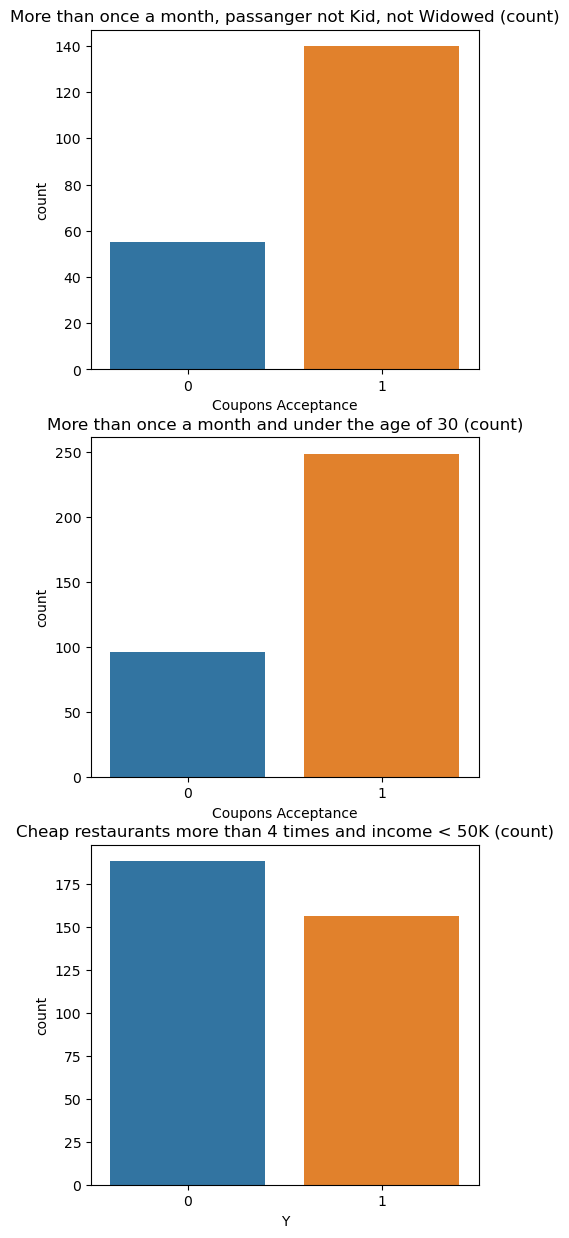

In [15]:
# Query the data frame against given conditions and plot to visualize them
# Define the lists for filtering the data
morethan1 = ['1~3', '4~8', 'gt8']
passangerlist = ['Friend(s)', 'Partner']
maritallist = ['Widowed'] 
ageunder30 = ['21', '26', 'below21']
cheaprestlist = ['4~8', 'gt8']
incomeless50k = ['$37500 - $49999', '$12500 - $24999','$25000 - $37499','Less than $12500']
rate5 = data_bar_cpn.query('Y == 1 and Bar in @morethan1 and passanger in @passangerlist and maritalStatus not in @maritallist').shape[0] / data_bar_cpn.shape[0]
rate6 = data_bar_cpn.query('Y == 1 and Bar in @morethan1 and age in @ageunder30').shape[0] / data_bar_cpn.shape[0]
rate7 = data_bar_cpn.query('Y == 1 and RestaurantLessThan20 in @cheaprestlist and income in @incomeless50k').shape[0] / data_bar_cpn.shape[0]
print('More than once a month, passanger not Kid, not Widowed', round(rate5*100,3),'%')
print('More than once a month and under the age of 30        ', round(rate6*100,3),'%')
print('Cheap restaurants more than 4 times and income < 50K  ', round(rate7*100,3),'%')

#Use subplot to visualize the use case together
fig,axes = plt.subplots(3, 1, figsize=(5, 15))
sns.countplot(data_bar_cpn.query('Bar in @morethan1 and passanger in @passangerlist and maritalStatus not in @maritallist'), x = 'Y',ax=axes[0])
sns.countplot(data_bar_cpn.query('Bar in @morethan1 and age in @ageunder30'), x = 'Y',ax=axes[1])
sns.countplot(data_bar_cpn.query('RestaurantLessThan20 in @cheaprestlist and income in @incomeless50k'), x = 'Y',ax=axes[2])
axes[0].set_title('More than once a month, passanger not Kid, not Widowed (count)')
axes[1].set_title('More than once a month and under the age of 30 (count)')
axes[2].set_title('Cheap restaurants more than 4 times and income < 50K (count)')
axes[0].set_xlabel('Coupons Acceptance')
axes[1].set_xlabel('Coupons Acceptance')


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

#### Observations/Hypothesis based on above investigation:
* Overall customers rejected more Bar coupons than they accepted.
* Customers who visited a Bar 3 or more times a month had a higher acceptance rate than those who visited less than 3 times a month.
* Customers who were over 25 and visited a Bar more than once a month had a higher acceptance rate than those under the age of 25 and on average less than a visit per month.
* Customers driving with Kid(s) as a passanger had a higher Bar coupon rejection rate.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### Review the data set information using data.info()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

#### Covariance Matrix

In [17]:
# Covariance matrix
data.cov(numeric_only = True)

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,366.894325,-0.186024,0.0,-1.476417,-1.341876,0.763692,-0.763692,0.581017
has_children,-0.186024,0.242648,0.0,0.019118,-0.002190,-0.006397,0.006397,-0.011115
toCoupon_GEQ5min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
toCoupon_GEQ15min,-1.476417,0.019118,0.0,0.246238,0.052242,-0.061855,0.061855,-0.020057
toCoupon_GEQ25min,-1.341876,-0.002190,0.0,0.052242,0.104944,-0.025585,0.025585,-0.016629
direction_same,0.763692,-0.006397,0.0,-0.061855,-0.025585,0.168651,-0.168651,0.002964
direction_opp,-0.763692,0.006397,0.0,0.061855,0.025585,-0.168651,0.168651,-0.002964
Y,0.581017,-0.011115,0.0,-0.020057,-0.016629,0.002964,-0.002964,0.245336


#### Observations:
* "direction_same" and "direction_opp" have the same variance and both are perfectly correlated. This means, we can drop one of them as they have exactly the opposite value in the column values.
* "toCoupon_GEQ5min" has 0 variance as it has only one value "1" in all the rows i.e. all restaurants are at least 5 mins or more from driver's location. Therefore we can drop this column as well.

In [18]:
# Drop direction_opp and toCoupon_GEQ5min
data = data.drop(['direction_opp', 'toCoupon_GEQ5min'], axis=1)

#### Check missing values

In [19]:
#Check missing values
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
Y                           0
dtype: int64

#### Drop Duplicate Data

In [20]:
print("Shape of the dataset before removing the duplicates:",data.shape)
data = data.drop_duplicates()
print("Shape of the dataset after removing the duplicates:",data.shape)

Shape of the dataset before removing the duplicates: (12684, 24)
Shape of the dataset after removing the duplicates: (12610, 24)


#### Drop irrelavant features and Fill missing values
* "car" feature has most values missing so this feature won't be of any use in the analysis.
* There are other 6 features that have missing values and those needs to filled before proceeding with the analysis. One common tennique used for filling missing values is Mode Imputation. Mode imputation fills the missing value of the categorical feature with the most common value of that feature. It is preferred when there is small number of unique values in that particular feature. Therefore, we will use Mode imputation method to fill the missing values in categorical features.


In [21]:
# Drop car feature
data = data.drop(['car'], axis=1)

In [22]:
# fill missing values
data['Bar'] = data['Bar'].fillna(data['Bar'].value_counts().index[0])
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(data['CoffeeHouse'].value_counts().index[0])
data['CarryAway'] = data['CarryAway'].fillna(data['CarryAway'].value_counts().index[0])
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].value_counts().index[0])
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(data['Restaurant20To50'].value_counts().index[0])


#### Coupon Acceptance Count and Percentage

In [23]:
# Take total count for acceptance and rejection
# Display them as count and percentage
Y_counts = data.groupby('Y').Y.count()
print('Accepted Coupon Count is: ',Y_counts[1],'(',round(Y_counts[1]/data.shape[0]*100,3),'%)')
print('Rejected Coupon Count is: ',Y_counts[0],'(',round(Y_counts[0]/data.shape[0]*100,3),'%)')


Accepted Coupon Count is:  7157 ( 56.757 %)
Rejected Coupon Count is:  5453 ( 43.243 %)


#### Data Statistics

In [24]:
# Show data's statistics
data.describe()

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
count,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000
mean,63.267248,0.414512,0.559794,0.116019,0.215543,0.567565
std,19.153386,0.492657,0.496432,0.320260,0.411215,0.495434
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,80.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
# Define a function for single feature analysis. 
# This function calculates the Total Count, Accepted Count, Rejected Count and their percentages
# It then plots the feature passed as argument to this function as bar chart and returns the dataframe
def univariate_analysis(feature, xt_rotation):
    univar_data = pd.DataFrame(sorted(list(data[feature].unique())),columns=[feature])
    univar_data['TotalCount'] = list(data.groupby(feature).Y.count())
    univar_data['Accepted'] = list(data[data.Y==1].groupby(feature).Y.count())
    univar_data['Rejected'] = list(data[data.Y==0].groupby(feature).Y.count())
    univar_data['%Accepted'] = round(univar_data['Accepted']/univar_data['TotalCount']*100,3)
    univar_data['%Rejected'] = round(univar_data['Rejected']/univar_data['TotalCount']*100,3)
    univar_data = univar_data.sort_values(by='TotalCount', ascending=False)
    
    fig = plt.subplots(figsize =(8, 4))
    plt.bar(univar_data[feature],univar_data['TotalCount'])
    plt.bar(univar_data[feature],univar_data['Accepted'])
    plt.legend(labels=['Total Count','Accepted'])
    plt.ylabel('Counts')
    plt.title(feature+' wise accepted coupons')
    plt.xticks(rotation = xt_rotation)
    plt.show()

    return univar_data

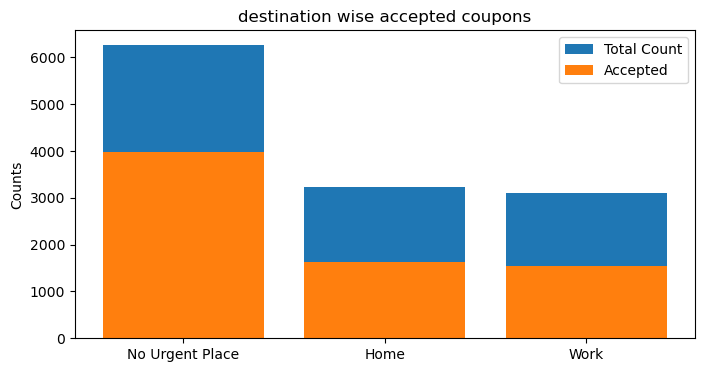

,destination,TotalCount,Accepted,Rejected,%Accepted,%Rejected
1,No Urgent Place,6266,3969,2297,63.342,36.658
0,Home,3230,1635,1595,50.619,49.381
2,Work,3114,1553,1561,49.872,50.128


In [26]:
univariate_analysis('destination',0)

#### Observations:
* Most drivers go to No Urgent Place than Home and Work.
* The drivers going to No Urgent Place accepted more coupons than others.
* The drivers going to Home and Work have almost similar coupon acceptance rate.

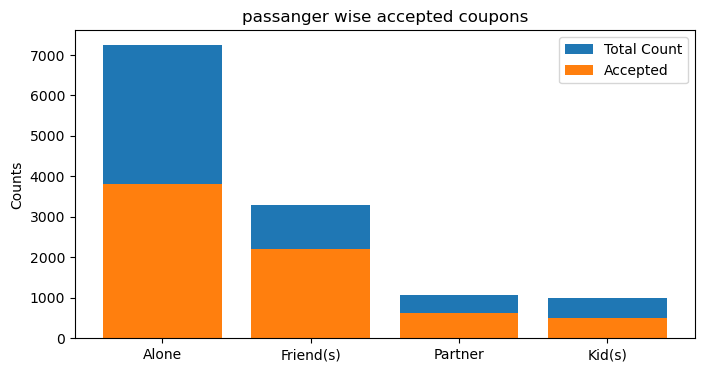

,passanger,TotalCount,Accepted,Rejected,%Accepted,%Rejected
0,Alone,7248,3801,3447,52.442,47.558
1,Friend(s),3292,2216,1076,67.315,32.685
3,Partner,1069,635,434,59.401,40.599
2,Kid(s),1001,505,496,50.450,49.550


In [27]:
univariate_analysis('passanger',0)

#### Observations:
* Most of the time the drivers were driving Alone.
* The drivers coupon acceptance rate was higher when they drove with Friend(s) or Partner than Alone.

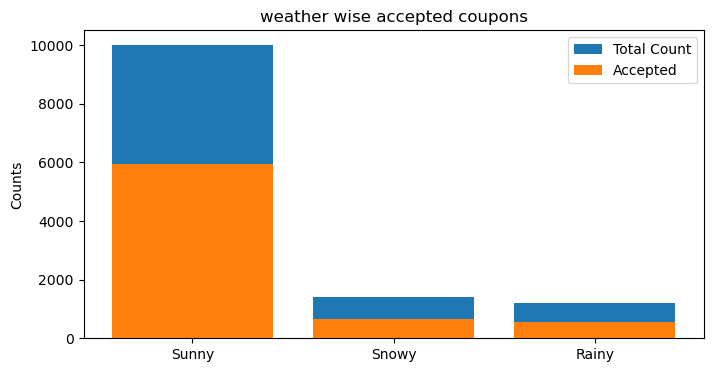

,weather,TotalCount,Accepted,Rejected,%Accepted,%Rejected
2,Sunny,10011,5941,4070,59.345,40.655
1,Snowy,1397,659,738,47.173,52.827
0,Rainy,1202,557,645,46.339,53.661


In [28]:
univariate_analysis('weather',0)

#### Observations:
* The drivers accepted the most coupons in Sunny weather than others.

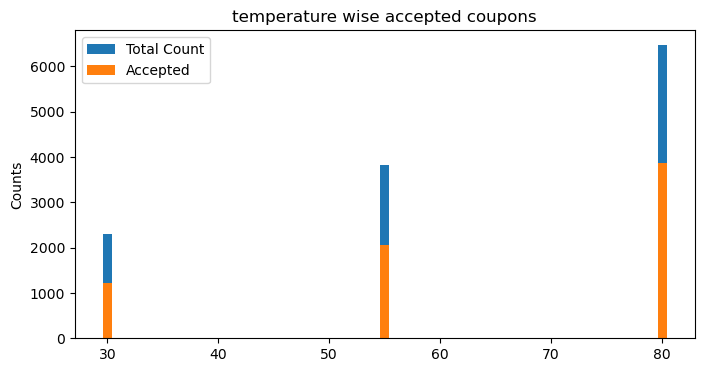

,temperature,TotalCount,Accepted,Rejected,%Accepted,%Rejected
2,80,6475,3876,2599,59.861,40.139
1,55,3830,2056,1774,53.681,46.319
0,30,2305,1225,1080,53.145,46.855


In [29]:
univariate_analysis('temperature',0)

#### Observations:
* The drivers accepted the most coupons in 80°F temperature than others.

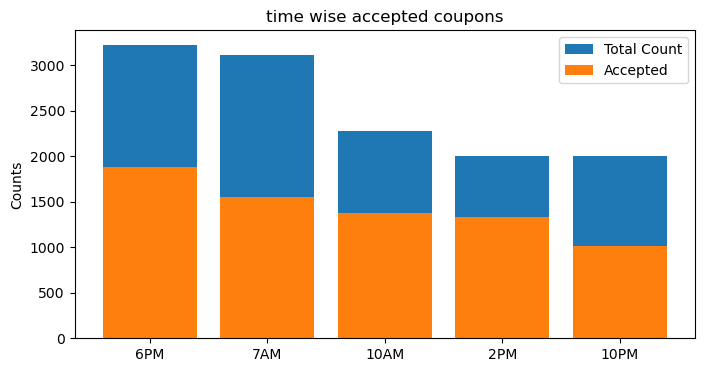

,time,TotalCount,Accepted,Rejected,%Accepted,%Rejected
3,6PM,3220,1881,1339,58.416,41.584
4,7AM,3114,1553,1561,49.872,50.128
0,10AM,2271,1380,891,60.766,39.234
2,2PM,2006,1327,679,66.152,33.848
1,10PM,1999,1016,983,50.825,49.175


In [30]:
univariate_analysis('time',0)

#### Observations:
* The highest acceptance rate of the coupons was at 2PM and 10AM.
* Most drivers go out at 6PM and 7AM.

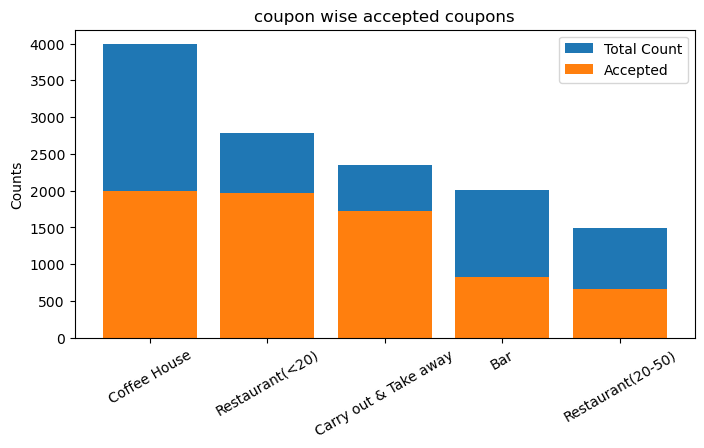

,coupon,TotalCount,Accepted,Rejected,%Accepted,%Rejected
2,Coffee House,3989,1989,2000,49.862,50.138
4,Restaurant(<20),2779,1967,812,70.781,29.219
1,Carry out & Take away,2344,1720,624,73.379,26.621
0,Bar,2010,824,1186,40.995,59.005
3,Restaurant(20-50),1488,657,831,44.153,55.847


In [31]:
univariate_analysis('coupon',30)

#### Observations:
* Most customers visited Coffee House and Cheaper Restaurant (Restaurant with average cost less than $20)
* The drivers coupon acceptance rate was higher for Carry out & Take Away and Restaurant<20 goers.

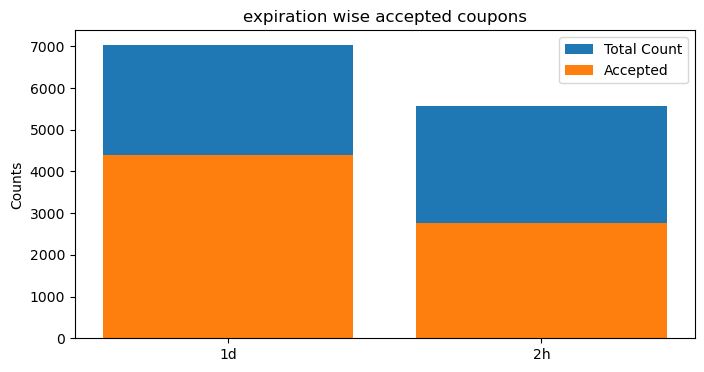

,expiration,TotalCount,Accepted,Rejected,%Accepted,%Rejected
0,1d,7031,4390,2641,62.438,37.562
1,2h,5579,2767,2812,49.597,50.403


In [32]:
univariate_analysis('expiration',0)

#### Observations:
* Coupons with 1 day expiry had the highest acceptance rate than 2 hrs.
* Almost 50% of the coupons with 2 hours expiry were accepted.

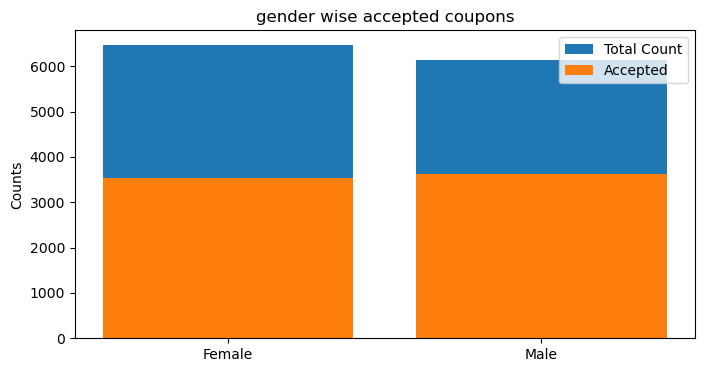

,gender,TotalCount,Accepted,Rejected,%Accepted,%Rejected
0,Female,6469,3535,2934,54.645,45.355
1,Male,6141,3622,2519,58.981,41.019


In [33]:
univariate_analysis('gender',0)

#### Observations:
* Male drivers accepted more coupons than Female drivers. However, the difference was not much.

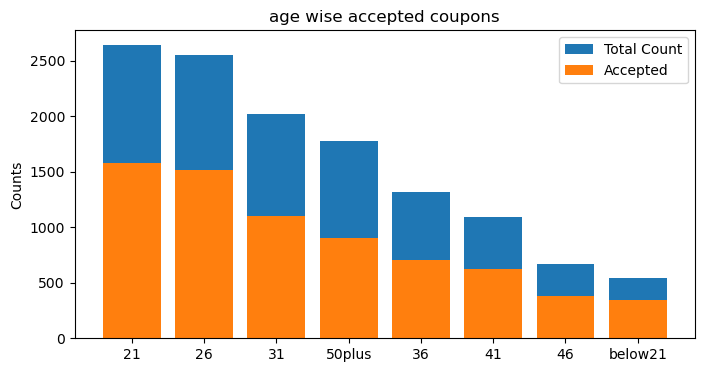

,age,TotalCount,Accepted,Rejected,%Accepted,%Rejected
0,21,2642,1579,1063,59.765,40.235
1,26,2548,1517,1031,59.537,40.463
2,31,2019,1102,917,54.581,45.419
6,50plus,1781,903,878,50.702,49.298
3,36,1317,705,612,53.531,46.469
4,41,1089,623,466,57.208,42.792
5,46,670,384,286,57.313,42.687
7,below21,544,344,200,63.235,36.765


In [34]:
univariate_analysis('age',0)

#### Observations:
* Most coupons were sent to drivers with age 21.
* Coupons acceptance rate was highest for drivers age below 21 and lowest for 50 plus.

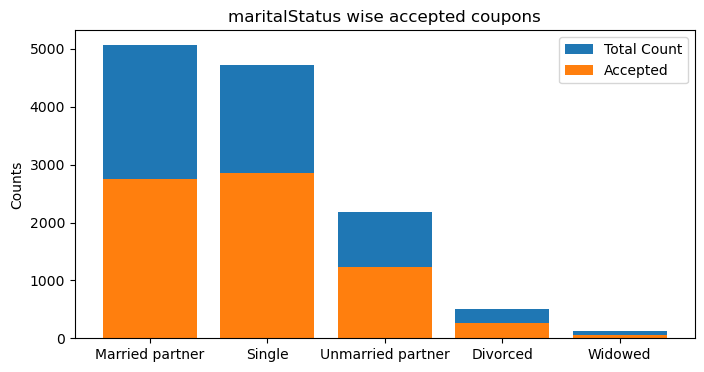

,maritalStatus,TotalCount,Accepted,Rejected,%Accepted,%Rejected
1,Married partner,5068,2749,2319,54.242,45.758
2,Single,4716,2851,1865,60.454,39.546
3,Unmarried partner,2185,1226,959,56.110,43.890
0,Divorced,511,269,242,52.642,47.358
4,Widowed,130,62,68,47.692,52.308


In [35]:
univariate_analysis('maritalStatus',0)

#### Observations:
* Most coupons were sent to the Married couples.
* The drivers who were Single accepted more coupons than others.

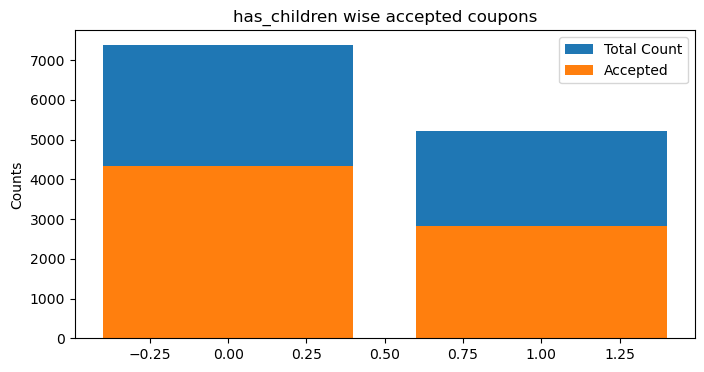

,has_children,TotalCount,Accepted,Rejected,%Accepted,%Rejected
0,0,7383,4329,3054,58.635,41.365
1,1,5227,2828,2399,54.104,45.896


In [36]:
univariate_analysis('has_children',0)

#### Observations:
* The drivers with no children had better acceptance rate than with children. However, the difference wasn't much.

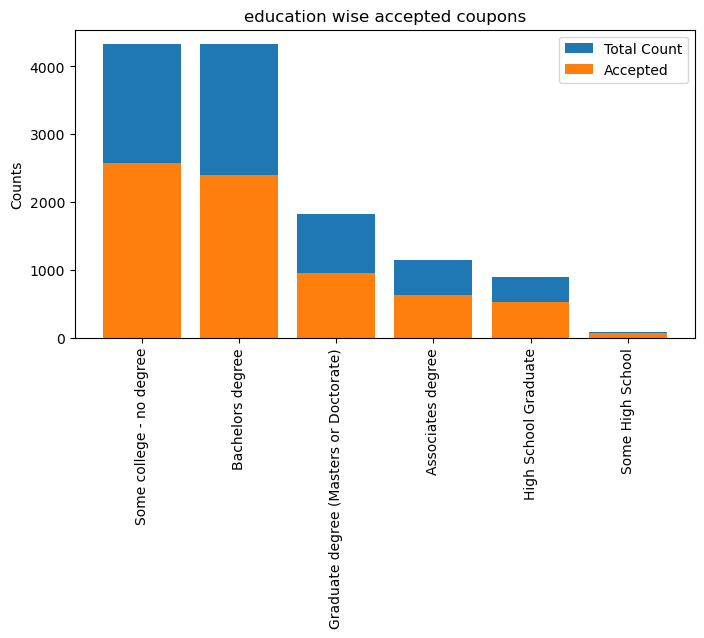

,education,TotalCount,Accepted,Rejected,%Accepted,%Rejected
5,Some college - no degree,4325,2577,1748,59.584,40.416
1,Bachelors degree,4323,2395,1928,55.401,44.599
2,Graduate degree (Masters or Doctorate),1827,956,871,52.326,47.674
0,Associates degree,1148,634,514,55.226,44.774
3,High School Graduate,899,532,367,59.177,40.823
4,Some High School,88,63,25,71.591,28.409


In [37]:
univariate_analysis('education',90)

#### Observations:
* Most drivers have education of 'Some college - no degree' or 'Bachelors degree'.
* Least number of coupon were sent to drivers with 'Some High School' education but they had the highest acceptance rate.

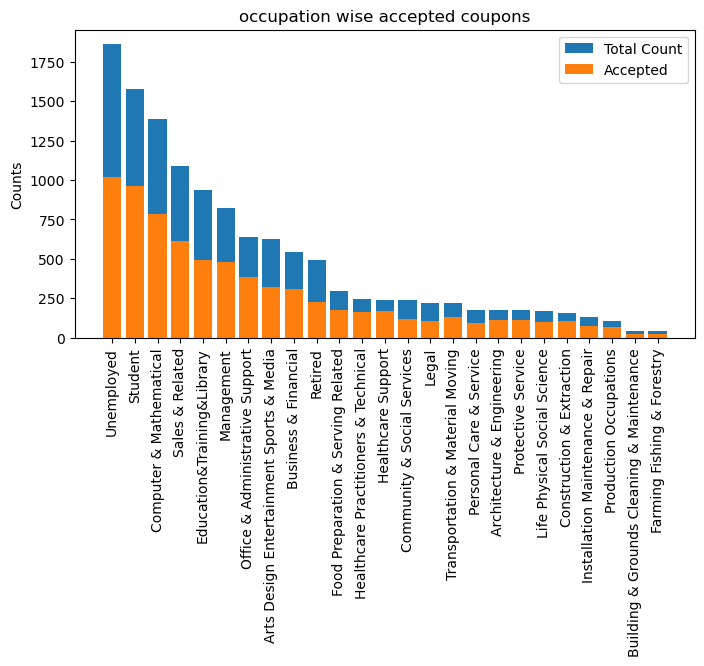

,occupation,TotalCount,Accepted,Rejected,%Accepted,%Rejected
24,Unemployed,1861,1019,842,54.756,45.244
22,Student,1575,960,615,60.952,39.048
5,Computer & Mathematical,1390,787,603,56.619,43.381
21,Sales & Related,1088,612,476,56.250,43.750
7,Education&Training&Library,939,490,449,52.183,47.817
15,Management,821,481,340,58.587,41.413
16,Office & Administrative Support,638,383,255,60.031,39.969
1,Arts Design Entertainment Sports & Media,627,324,303,51.675,48.325
3,Business & Financial,543,309,234,56.906,43.094
20,Retired,493,225,268,45.639,54.361


In [38]:
univariate_analysis('occupation',90)

#### Observations:
* Most coupons were sent to drivers with Unemployed and Student as their occupation.
* Drivers with the 'Healthcare Support' as the occupation had the highest coupon acceptance rate followed by 'Construction & Extraction'.

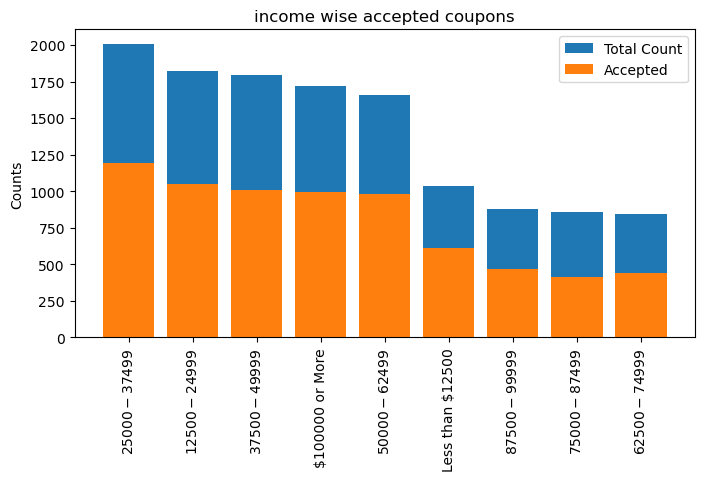

,income,TotalCount,Accepted,Rejected,%Accepted,%Rejected
2,$25000 - $37499,2006,1190,816,59.322,40.678
1,$12500 - $24999,1825,1047,778,57.370,42.630
3,$37500 - $49999,1795,1010,785,56.267,43.733
0,$100000 or More,1717,992,725,57.775,42.225
4,$50000 - $62499,1655,984,671,59.456,40.544
8,Less than $12500,1034,612,422,59.188,40.812
7,$87500 - $99999,879,465,414,52.901,47.099
6,$75000 - $87499,856,414,442,48.364,51.636
5,$62500 - $74999,843,443,400,52.550,47.450


In [39]:
univariate_analysis('income',90)

#### Observations:
* Most coupons were sent to drivers with income in the range of 25000-37499.
* Drivers with low income ( up to 62499) accepted the most coupons and mid-range income (62500 to 99999) drivers rejected the most.

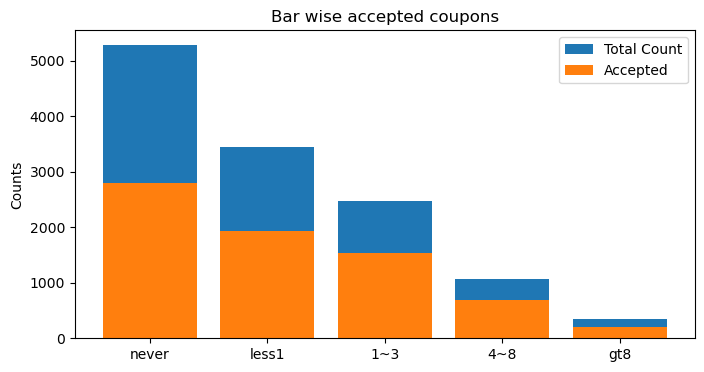

,Bar,TotalCount,Accepted,Rejected,%Accepted,%Rejected
4,never,5285,2806,2479,53.094,46.906
3,less1,3438,1936,1502,56.312,43.688
0,1~3,2468,1533,935,62.115,37.885
1,4~8,1071,681,390,63.585,36.415
2,gt8,348,201,147,57.759,42.241


In [40]:
univariate_analysis('Bar',0)

#### Observations:
* Most drivers never visited a Bar.
* Drivers with 1 to 8 Bar visits (1-3 and 4-8) had the highest coupon acceptance rate.

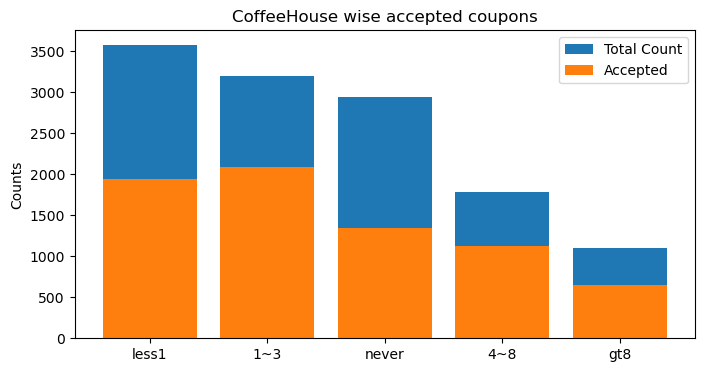

,CoffeeHouse,TotalCount,Accepted,Rejected,%Accepted,%Rejected
3,less1,3579,1949,1630,54.457,45.543
0,1~3,3199,2089,1110,65.302,34.698
4,never,2946,1348,1598,45.757,54.243
1,4~8,1779,1125,654,63.238,36.762
2,gt8,1107,646,461,58.356,41.644


In [41]:
univariate_analysis('CoffeeHouse',0)

#### Observations:
* Drivers who never visited a CoffeeHouse rejected the coupons most.
* Drivers who visited a CoffeeHouse between 1 to 8 times (1-3 and 4-8) had the highest coupon acceptance rate.

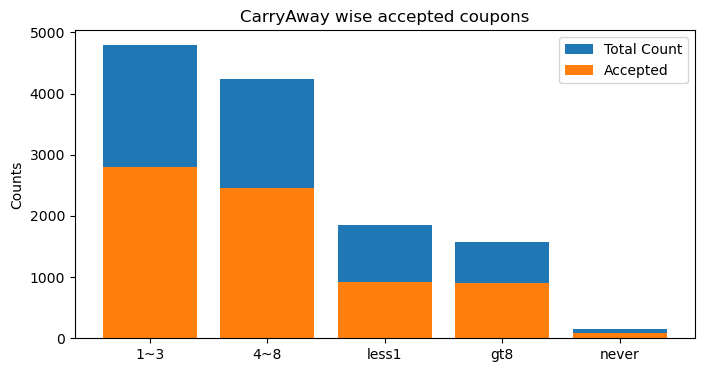

,CarryAway,TotalCount,Accepted,Rejected,%Accepted,%Rejected
0,1~3,4795,2793,2002,58.248,41.752
1,4~8,4242,2462,1780,58.039,41.961
3,less1,1849,921,928,49.811,50.189
2,gt8,1572,900,672,57.252,42.748
4,never,152,81,71,53.289,46.711


In [42]:
univariate_analysis('CarryAway',0)

#### Observations:
* Most coupons were sent to drivers who had CarryAway between 1 to 8 (1-3 and 4-8) in past.
* Drivers with fewer or never CarryAway experience rejected the coupons most.
* Drivers who had CarryAway between 1 to 8 times (1-3 and 4-8) had the highest coupon acceptance rate.

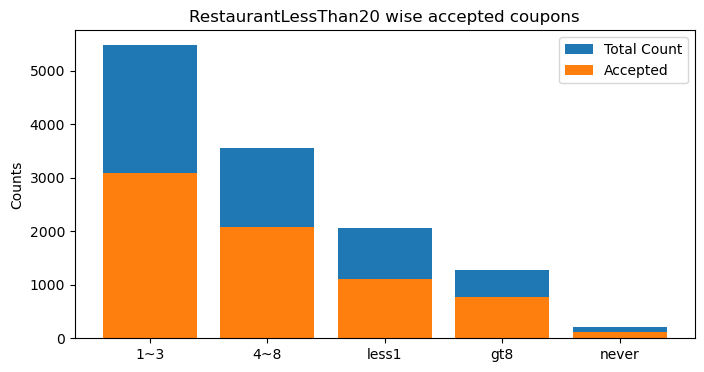

,RestaurantLessThan20,TotalCount,Accepted,Rejected,%Accepted,%Rejected
0,1~3,5485,3083,2402,56.208,43.792
1,4~8,3553,2075,1478,58.401,41.599
3,less1,2071,1103,968,53.259,46.741
2,gt8,1282,779,503,60.764,39.236
4,never,219,117,102,53.425,46.575


In [43]:
univariate_analysis('RestaurantLessThan20',0)

#### Observations:
* Most coupons were sent to drivers who had been to inexpensive restaurants (average expense less than \$20) between 1 to 8 (1-3 and 4-8) in past.
* Drivers with fewer or no visits to inexpensive restaurants rejected the coupons most.
* Drivers with more than 8 visits to inexpensive restaurants had the highest coupon acceptance rate.

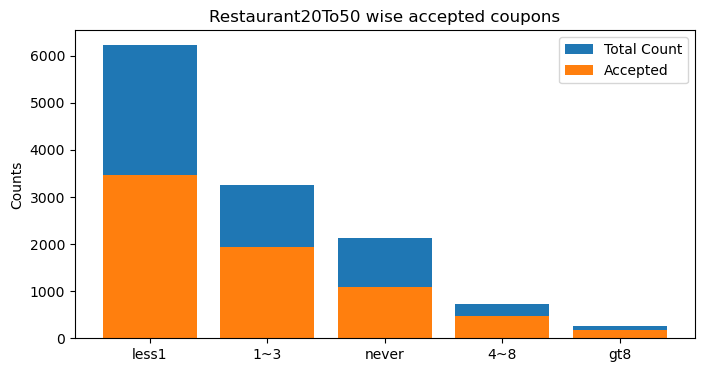

,Restaurant20To50,TotalCount,Accepted,Rejected,%Accepted,%Rejected
3,less1,6230,3468,2762,55.666,44.334
0,1~3,3266,1942,1324,59.461,40.539
4,never,2122,1095,1027,51.602,48.398
1,4~8,728,477,251,65.522,34.478
2,gt8,264,175,89,66.288,33.712


In [44]:
univariate_analysis('Restaurant20To50',0)

#### Observations:
* Most coupons were sent to drivers who on average had less than 1 visits to expensive restaurants (average expense between \$20 to \\$50).
* Drivers with fewer or no visits to expensive restaurants rejected the coupons most.
* Drivers with more than 4 visits to expensive restaurants accepted the coupons almost 66% of the time.

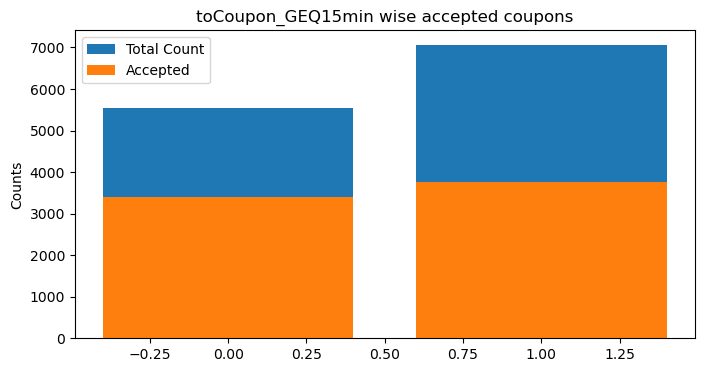

,toCoupon_GEQ15min,TotalCount,Accepted,Rejected,%Accepted,%Rejected
1,1,7059,3750,3309,53.124,46.876
0,0,5551,3407,2144,61.376,38.624


In [45]:
univariate_analysis('toCoupon_GEQ15min',0)

#### Observations:
* Most coupons were sent to the drivers who were 15 mins or more from the restaurants.
* Drivers who were less than 15 mins from restaurants had the better coupon acceptance rate.

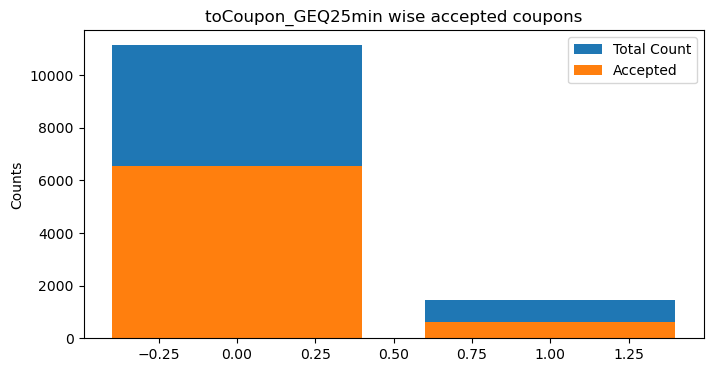

,toCoupon_GEQ25min,TotalCount,Accepted,Rejected,%Accepted,%Rejected
0,0,11147,6543,4604,58.697,41.303
1,1,1463,614,849,41.969,58.031


In [46]:
univariate_analysis('toCoupon_GEQ25min',0)

#### Observations:
* Most coupons were sent to the drivers who were less than 25 mins from the restaurants.
* Drivers who were 25 mins or more from the restaurants had the highest coupon rejection rate.

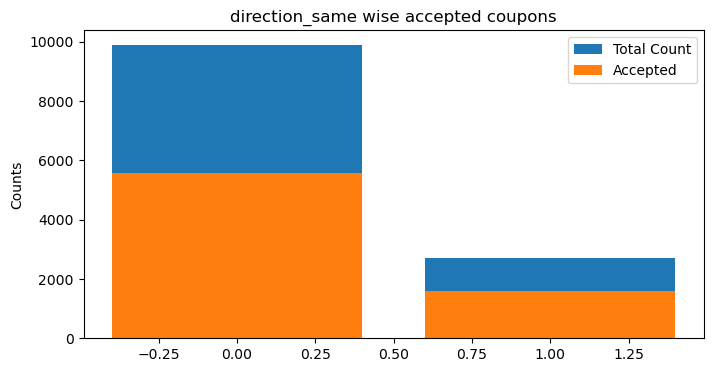

,direction_same,TotalCount,Accepted,Rejected,%Accepted,%Rejected
0,0,9892,5576,4316,56.369,43.631
1,1,2718,1581,1137,58.168,41.832


In [47]:
univariate_analysis('direction_same',0)

#### Observations:
* Drivers driving in the same or opposite direction had a very similar coupon acceptance rate.

### Next step is to analyze the features in combination with the another feature a.k.a. Bivariate Analysis

In [48]:
# Define a function to perform the analysis based on the combination of two features
def bivariate_analysis(feature1,feature2,col1,col2,display_row):
    f1 = list(data[feature1].unique())
    f2 = list(data[feature2].unique())
    bivar_data = pd.DataFrame([(i, j) for i in f1 for j in f2], columns=[feature1,feature2])
    TotalCount = []
    Accepted = []
    Rejected = []
    for i in range(bivar_data.shape[0]):
        TotalCount.append((data[(col1==bivar_data[feature1][i]) & (col2==bivar_data[feature2][i])]).shape[0])
        Accepted.append((data[(col1==bivar_data[feature1][i]) & (col2==bivar_data[feature2][i]) & (data.Y==1)]).shape[0])
        Rejected.append((data[(col1==bivar_data[feature1][i]) & (col2==bivar_data[feature2][i]) & (data.Y==0)]).shape[0])
    bivar_data['TotalCount'] = TotalCount
    bivar_data['Accepted'] = Accepted
    bivar_data['Rejected'] = Rejected
    bivar_data['%Accepted'] = round(bivar_data['Accepted']/bivar_data['TotalCount']*100,3)
    bivar_data['%Rejected'] = round(bivar_data['Rejected']/bivar_data['TotalCount']*100,3)
    bivar_data = bivar_data.dropna()
    bivar_data = bivar_data.sort_values(by='%Accepted', ascending=False)
    merge = pd.concat([bivar_data.head(display_row), bivar_data.tail(display_row)], axis=0)
    return merge

#### Q1. What Coupon Types were accepted the most at different times of the day based on it's Expiry?

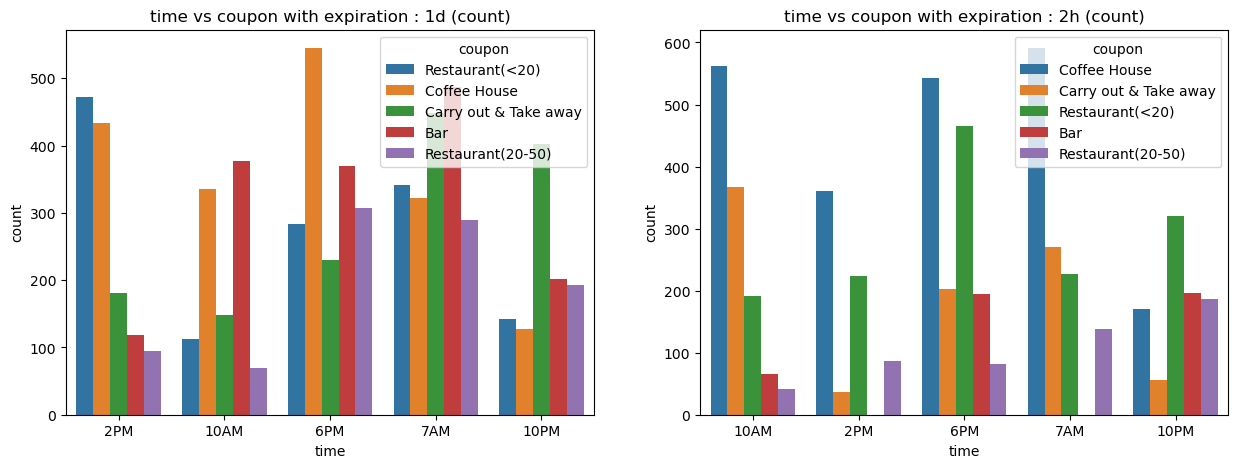

In [49]:
# Visualize time vs coupon against expiration of 1d and 2h
fig1,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x = data[data.expiration == '1d']['time'],hue=data[data.expiration == '1d']['coupon'],ax=axes[0])
sns.countplot(x = data[data.expiration == '2h']['time'],hue=data[data.expiration == '2h']['coupon'],ax=axes[1])
axes[0].set_title('time vs coupon with expiration : 1d (count)'); axes[1].set_title('time vs coupon with expiration : 2h (count)');

In [50]:
bivariate_analysis('coupon','expiration',data.coupon,data.expiration,4)

,coupon,expiration,TotalCount,Accepted,Rejected,%Accepted,%Rejected
0,Restaurant(<20),1d,1351,1123,228,83.124,16.876
4,Carry out & Take away,1d,1411,1102,309,78.101,21.899
5,Carry out & Take away,2h,933,618,315,66.238,33.762
1,Restaurant(<20),2h,1428,844,584,59.104,40.896
3,Coffee House,2h,2226,961,1265,43.172,56.828
6,Bar,1d,1553,640,913,41.211,58.789
7,Bar,2h,457,184,273,40.263,59.737
9,Restaurant(20-50),2h,535,160,375,29.907,70.093


In [51]:
bivariate_analysis('coupon','time',data.coupon,data.time,4)

,coupon,time,TotalCount,Accepted,Rejected,%Accepted,%Rejected
10,Carry out & Take away,2PM,218,189,29,86.697,13.303
2,Restaurant(<20),6PM,748,619,129,82.754,17.246
12,Carry out & Take away,6PM,433,357,76,82.448,17.552
0,Restaurant(<20),2PM,696,567,129,81.466,18.534
18,Bar,7AM,487,178,309,36.550,63.450
16,Bar,10AM,443,160,283,36.117,63.883
15,Bar,2PM,118,40,78,33.898,66.102
24,Restaurant(20-50),10PM,380,125,255,32.895,67.105


#### Observations:
* Most drivers accepted 1d expiration coupons than 2h expiration coupons.
* Carry out & Take away coupons were most accepted of any coupon category after combining 1d and 2h acceptance.
* Most drivers accepted the coupons with 1d expiration of Restaurant(<20) and Carry out & Take away.
* Expensive restaurants coupons i.e. Restaurant(20-50), were the least preferred category among the drivers.
* CoffeeHouse coupons were sent the most between 7AM to 6PM.
* Drivers mostly accepted Restaurant(<20) and Carry out coupons with acceptance rate above 80% at 2PM and 6PM.
* Drivers rejected the expensive restaurant coupons the most at 10PM time.

#### Q2. Compare customers in various age groups to their marital status and passsangers accompanied them.

Text(0.5, 1.0, 'age vs maritalStatus (count)')

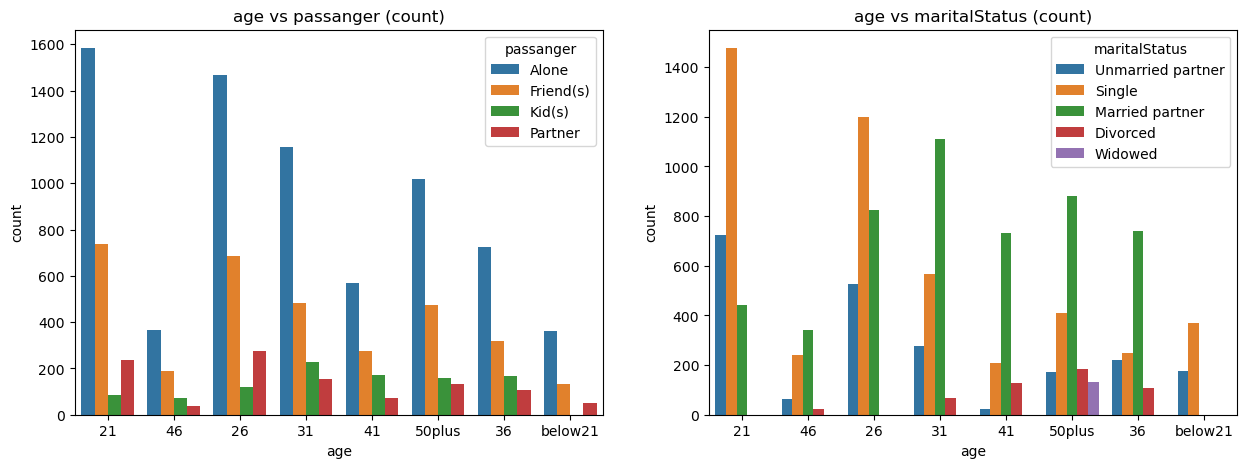

In [52]:
# Visualize age vs passanger and age vs maritalStatus features
fig2,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x = data['age'],hue=data['passanger'],ax=axes[0])
sns.countplot(x = data['age'],hue=data['maritalStatus'],ax=axes[1])
axes[0].set_title('age vs passanger (count)')
axes[1].set_title('age vs maritalStatus (count)') 

In [53]:
bivariate_analysis('age','passanger',data.age,data.passanger,4)

,age,passanger,TotalCount,Accepted,Rejected,%Accepted,%Rejected
19,41,Partner,72,55,17,76.389,23.611
7,46,Partner,38,28,10,73.684,26.316
9,26,Friend(s),685,497,188,72.555,27.445
29,below21,Friend(s),132,94,38,71.212,28.788
18,41,Kid(s),170,81,89,47.647,52.353
22,50plus,Kid(s),157,74,83,47.134,52.866
23,50plus,Partner,133,60,73,45.113,54.887
14,31,Kid(s),226,98,128,43.363,56.637


In [54]:
bivariate_analysis('age','maritalStatus',data.age,data.maritalStatus,4)

,age,maritalStatus,TotalCount,Accepted,Rejected,%Accepted,%Rejected
30,36,Unmarried partner,220,146,74,66.364,33.636
36,below21,Single,368,244,124,66.304,33.696
20,41,Unmarried partner,22,14,8,63.636,36.364
1,21,Single,1477,928,549,62.830,37.170
32,36,Married partner,740,371,369,50.135,49.865
29,50plus,Widowed,130,62,68,47.692,52.308
33,36,Divorced,109,45,64,41.284,58.716
25,50plus,Unmarried partner,173,64,109,36.994,63.006


#### Observations:
* Drivers at age 41 and 46 were mostly accompanied by their Partner and had the highest coupon acceptance rate.
* Drivers of younger age (below21 and 26) were mostly accompanied by their Friend(s).  
* All Widowed customers were in 50plus age groups.
* Below21 drivers never had Kids as the passangers on their side.

#### Q3. Which age group customers accepted more coupons?

Text(0, 0.5, 'acceptance rate')

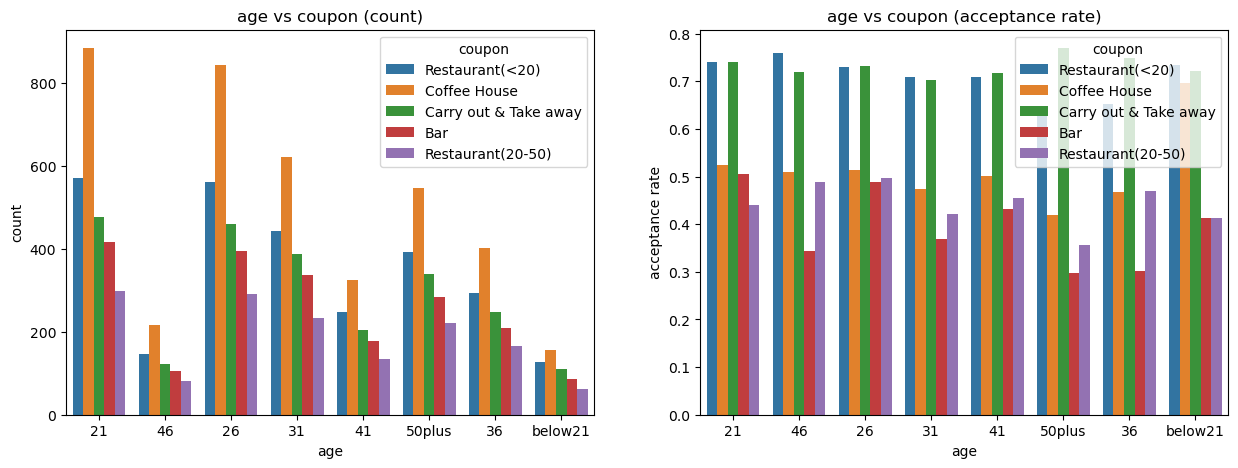

In [55]:
# Visualize count of age vs coupon and acceptance rate of age vs coupon features
fig3,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x = data['age'],hue=data['coupon'],ax=axes[0])
sns.barplot(ax=axes[1], x="age", y="Y", hue='coupon', errorbar=None, data=data)
axes[0].set_title('age vs coupon (count)') 
axes[1].set_title('age vs coupon (acceptance rate)')
axes[1].set_ylabel('acceptance rate')

#### Observations:
* Mostly all age customers accepted the coupons from inexpensive restaurants (Restaurant(<20)) and for Carry out & Take away.
* Acceptance rate of expensive restaurants (Restaurant(20-50)) was least among all age customers.
* Bar coupons were accepted more by the age of 21 and 26 than others.

#### Q4. How Coffee House coupons were accepted by customers based on their prior Coffee House visits?

Text(0, 0.5, 'acceptance rate')

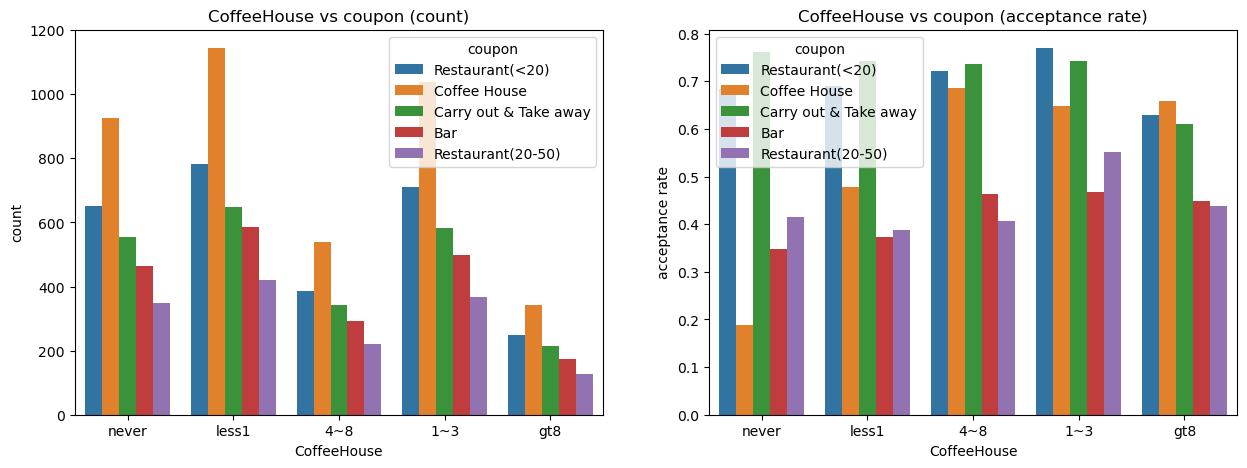

In [56]:
# Visualize count of CoffeeHouse vs coupon and acceptance rate of CoffeeHouse vs coupon features
fig4,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x = data['CoffeeHouse'],hue=data['coupon'],ax=axes[0])
sns.barplot(ax=axes[1], x="CoffeeHouse", y="Y", hue='coupon', errorbar=None, data=data)
axes[0].set_title('CoffeeHouse vs coupon (count)') 
axes[1].set_title('CoffeeHouse vs coupon (acceptance rate)')
axes[1].set_ylabel('acceptance rate')

In [57]:
df_cpn = bivariate_analysis('CoffeeHouse','coupon',data.CoffeeHouse,data.coupon,12)
df_cpn.query("coupon == 'Coffee House'")

,CoffeeHouse,coupon,TotalCount,Accepted,Rejected,%Accepted,%Rejected
11,4~8,Coffee House,538,369,169,68.587,31.413
21,gt8,Coffee House,342,225,117,65.789,34.211
16,1~3,Coffee House,1038,672,366,64.740,35.260
6,less1,Coffee House,1144,548,596,47.902,52.098
1,never,Coffee House,927,175,752,18.878,81.122


#### Observations:
* Acceptance rate of Coffee House coupons was the highest among the customers who had visited Coffee House 4 or more times in past.
* Customers who had never visited a Coffee House in past rejected the most Coffee House coupons.

#### Q5. How Carry Away coupons were accepted by customers based on their prior use of Carry Away services?

Text(0, 0.5, 'acceptance rate')

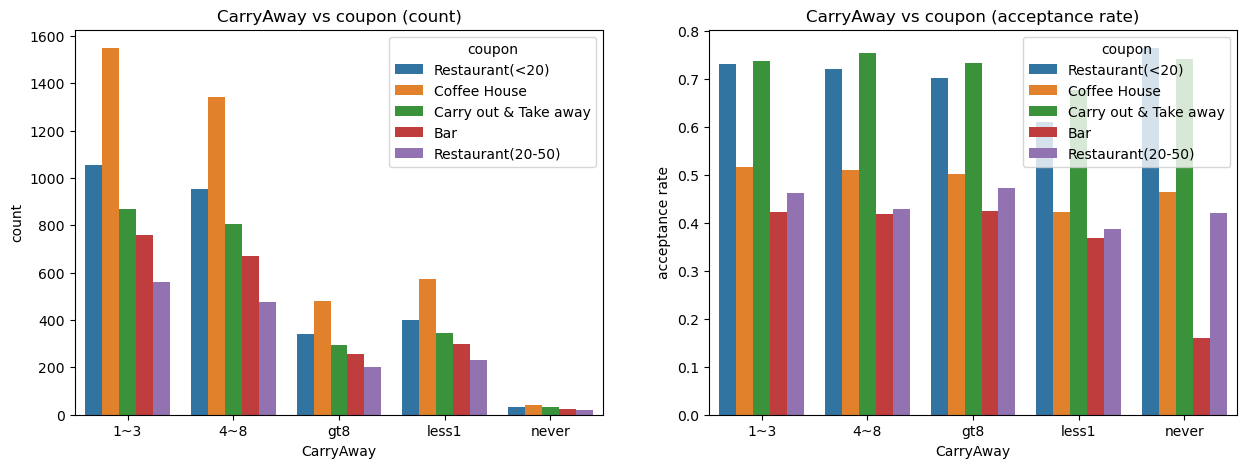

In [58]:
# Visualize count of CarryAway vs coupon and acceptance rate of CarryAway vs coupon features
fig5,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x = data['CarryAway'],hue=data['coupon'],ax=axes[0])
sns.barplot(ax=axes[1], x="CarryAway", y="Y", hue='coupon', errorbar=None, data=data)
axes[0].set_title('CarryAway vs coupon (count)')
axes[1].set_title('CarryAway vs coupon (acceptance rate)')
axes[1].set_ylabel('acceptance rate')

In [59]:
df_cpn = bivariate_analysis('CarryAway','coupon',data.CarryAway,data.coupon,12)
df_cpn.query("coupon == 'Carry out & Take away'")

,CarryAway,coupon,TotalCount,Accepted,Rejected,%Accepted,%Rejected
7,4~8,Carry out & Take away,804,606,198,75.373,24.627
22,never,Carry out & Take away,31,23,8,74.194,25.806
2,1~3,Carry out & Take away,870,642,228,73.793,26.207
12,gt8,Carry out & Take away,293,215,78,73.379,26.621
17,less1,Carry out & Take away,346,234,112,67.630,32.370


#### Observations:
* Acceptance rate of Carry away coupons was the highest among the customers who had used Carry away services 4 to 8 times in past.
* Customers who had never used a Carry away service in past had the second most highest acceptance rate of Carry away coupons.
* Least number of Carry away coupons were sent to customers who had never used Carry away services in past.
* Almost all customers had a good acceptance rate for Carry away coupons.

#### Q6. How inexpensive restaurants coupons were accepted by customers based on their prior visits to inexpensive restaurants?

Text(0, 0.5, 'acceptance rate')

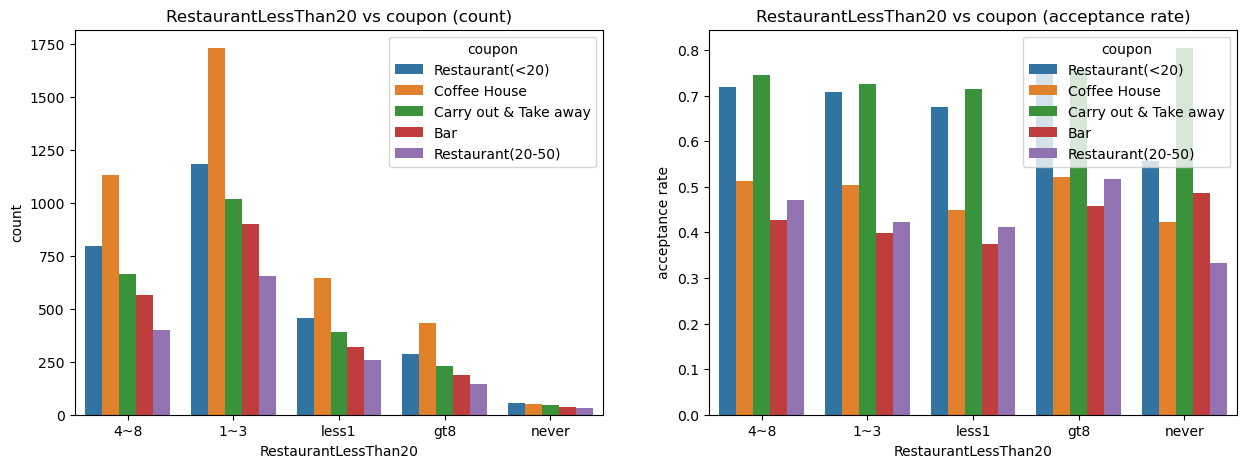

In [60]:
# Visualize count of RestaurantLessThan20 vs coupon and acceptance rate of RestaurantLessThan20 vs coupon features
fig6,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x = data['RestaurantLessThan20'],hue=data['coupon'],ax=axes[0])
sns.barplot(ax=axes[1], x="RestaurantLessThan20", y="Y", hue='coupon', errorbar=None, data=data)
axes[0].set_title('RestaurantLessThan20 vs coupon (count)') 
axes[1].set_title('RestaurantLessThan20 vs coupon (acceptance rate)')
axes[1].set_ylabel('acceptance rate')

In [61]:
df_cpn = bivariate_analysis('RestaurantLessThan20','coupon',data.RestaurantLessThan20,data.coupon,12)
df_cpn.query("coupon == 'Restaurant(<20)'")

,RestaurantLessThan20,coupon,TotalCount,Accepted,Rejected,%Accepted,%Rejected
15,gt8,Restaurant(<20),288,219,69,76.042,23.958
0,4~8,Restaurant(<20),795,572,223,71.950,28.050
5,1~3,Restaurant(<20),1184,837,347,70.693,29.307
10,less1,Restaurant(<20),458,309,149,67.467,32.533
20,never,Restaurant(<20),54,30,24,55.556,44.444


#### Observations:
* Acceptance rate of Inexpensive Restaurants coupons was the highest among the customers who had visited them more than 8 times in past.
* Customers who had never been to an Inexpensive Restaurants in past still had acceptance rate above 50%.
* Almost all customers had a good acceptance rate for Inexpensive Restaurants coupons.

#### Q7. How expensive restaurant coupons were accepted by customers based on their prior visits to expensive restaurants?

Text(0, 0.5, 'acceptance rate')

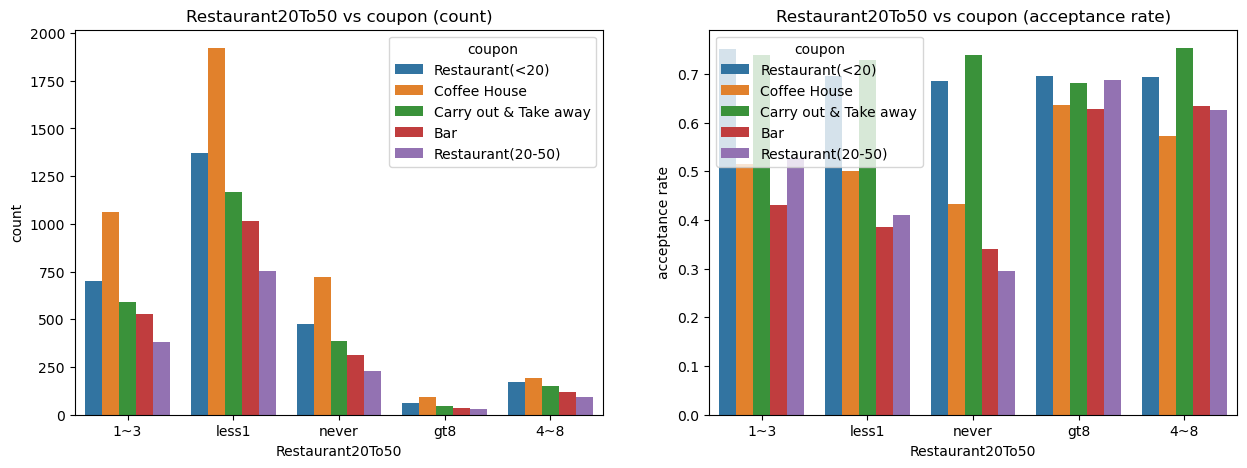

In [62]:
# Visualize count of Restaurant20To50 vs coupon and acceptance rate of Restaurant20To50 vs coupon features
fig7,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x = data['Restaurant20To50'],hue=data['coupon'],ax=axes[0])
sns.barplot(ax=axes[1], x="Restaurant20To50", y="Y", hue='coupon', errorbar=None, data=data)
axes[0].set_title('Restaurant20To50 vs coupon (count)') 
axes[1].set_title('Restaurant20To50 vs coupon (acceptance rate)')
axes[1].set_ylabel('acceptance rate')

In [63]:
df_cpn = bivariate_analysis('Restaurant20To50','coupon',data.Restaurant20To50,data.coupon,12)
df_cpn.query("coupon == 'Restaurant(20-50)'")

,Restaurant20To50,coupon,TotalCount,Accepted,Rejected,%Accepted,%Rejected
19,gt8,Restaurant(20-50),32,22,10,68.750,31.250
24,4~8,Restaurant(20-50),91,57,34,62.637,37.363
4,1~3,Restaurant(20-50),381,201,180,52.756,47.244
9,less1,Restaurant(20-50),754,309,445,40.981,59.019
14,never,Restaurant(20-50),230,68,162,29.565,70.435


#### Observations:
* Acceptance rate of Expensive Restaurants coupons was the highest among the customers who had visited them more than 8 times in past.
* Customers who had never been to an Expensive Restaurants in past had the highest rejection rate.

#### Q8. What time do the customers mostly go out and with whom?

Text(0.5, 1.0, 'destination vs time (count)')

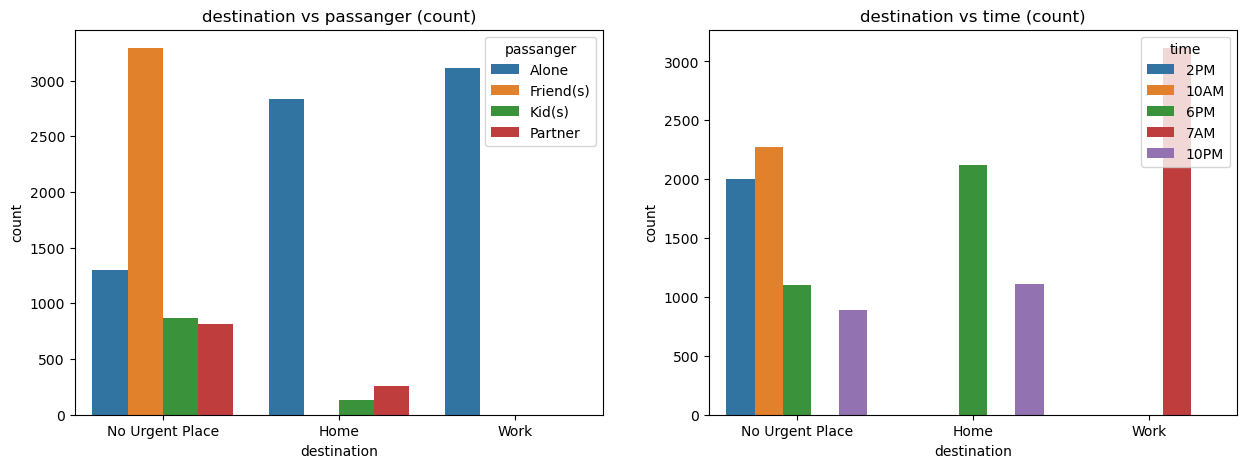

In [64]:
# Visualize count of destination vs passanger and destination vs time features
fig8,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x = data['destination'],hue=data['passanger'],ax=axes[0])
sns.countplot(x = data['destination'],hue=data['time'],ax=axes[1])
axes[0].set_title('destination vs passanger (count)')
axes[1].set_title('destination vs time (count)')

In [65]:
bivariate_analysis('destination','time',data.destination,data.time,3)

,destination,time,TotalCount,Accepted,Rejected,%Accepted,%Rejected
2,No Urgent Place,6PM,1102,730,372,66.243,33.757
0,No Urgent Place,2PM,2006,1327,679,66.152,33.848
1,No Urgent Place,10AM,2271,1380,891,60.766,39.234
7,Home,6PM,2118,1151,967,54.344,45.656
13,Work,7AM,3114,1553,1561,49.872,50.128
9,Home,10PM,1112,484,628,43.525,56.475


In [66]:
bivariate_analysis('passanger','time',data.passanger,data.time,3)

,passanger,time,TotalCount,Accepted,Rejected,%Accepted,%Rejected
7,Friend(s),6PM,592,448,144,75.676,24.324
0,Alone,2PM,361,265,96,73.407,26.593
17,Partner,6PM,309,216,93,69.903,30.097
12,Kid(s),6PM,267,125,142,46.816,53.184
4,Alone,10PM,990,461,529,46.566,53.434
14,Kid(s),10PM,167,43,124,25.749,74.251


#### Observations:
* Customers only went to Work at 7AM and that too Alone only.
* Customers only went to No Urgent Place at 2PM.
* Coupons acceptance rate were higher when customers were going to No Urgent Place at 6PM.
* Coupons acceptance rate were higher when customers were going with their Friend(s) at 6PM.
* Customers with Kid(s) at 10PM had the highest coupons rejection rate.

#### Q9. How's the customers driving habits with respect to time and temperature?

Text(0.5, 1.0, 'time vs temperature (count)')

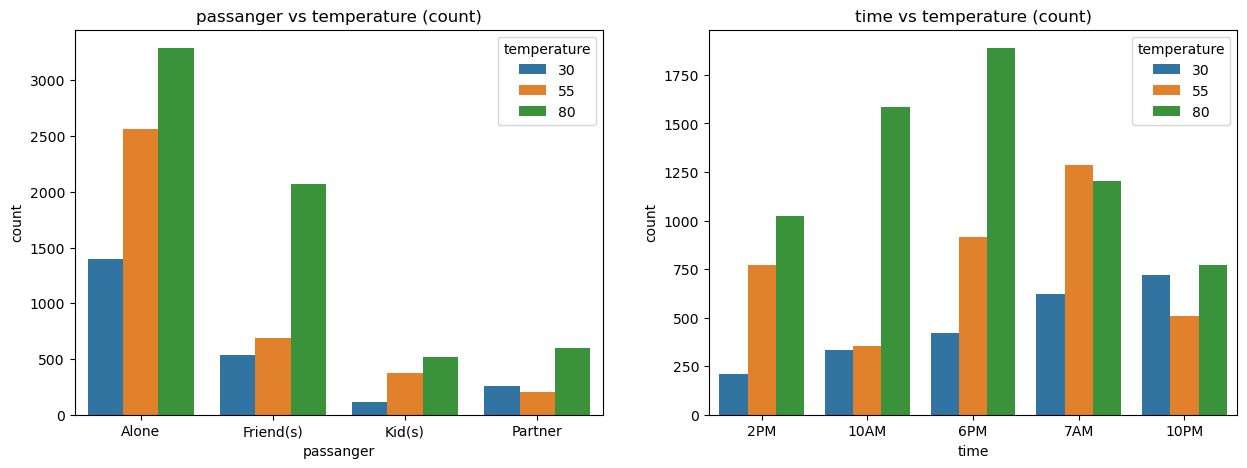

In [67]:
# Visualize count of passanger vs temperature and time vs temperature features
fig9,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x = data['passanger'],hue=data['temperature'],ax=axes[0])
sns.countplot(x = data['time'],hue=data['temperature'],ax=axes[1])
axes[0].set_title('passanger vs temperature (count)')
axes[1].set_title('time vs temperature (count)')

In [68]:
bivariate_analysis('temperature','coupon',data.temperature,data.coupon,4)

,temperature,coupon,TotalCount,Accepted,Rejected,%Accepted,%Rejected
5,80,Restaurant(<20),1572,1195,377,76.018,23.982
12,30,Carry out & Take away,747,564,183,75.502,24.498
0,55,Restaurant(<20),660,482,178,73.030,26.970
7,80,Carry out & Take away,1023,744,279,72.727,27.273
4,55,Restaurant(20-50),368,156,212,42.391,57.609
8,80,Bar,633,260,373,41.074,58.926
14,30,Restaurant(20-50),270,92,178,34.074,65.926
13,30,Bar,424,138,286,32.547,67.453


#### Observations:
* Most customers went out Alone when temperature was 80°F.
* Most customers went out at 6PM in 80°F temperature.
* At 80°F, coupons acceptance rate was higher for Inexpensive Restaurants coupons.
* At 30°F, coupons acceptance rate was higher for Carry out & Take away coupons.
* At 30°F, customers rejected the Bar and Expensive Restaurants coupons the most.

#### Q10. How's the coupon acceptance rate among customers with respect to their marital and kid status?

Text(0, 0.5, 'acceptance rate')

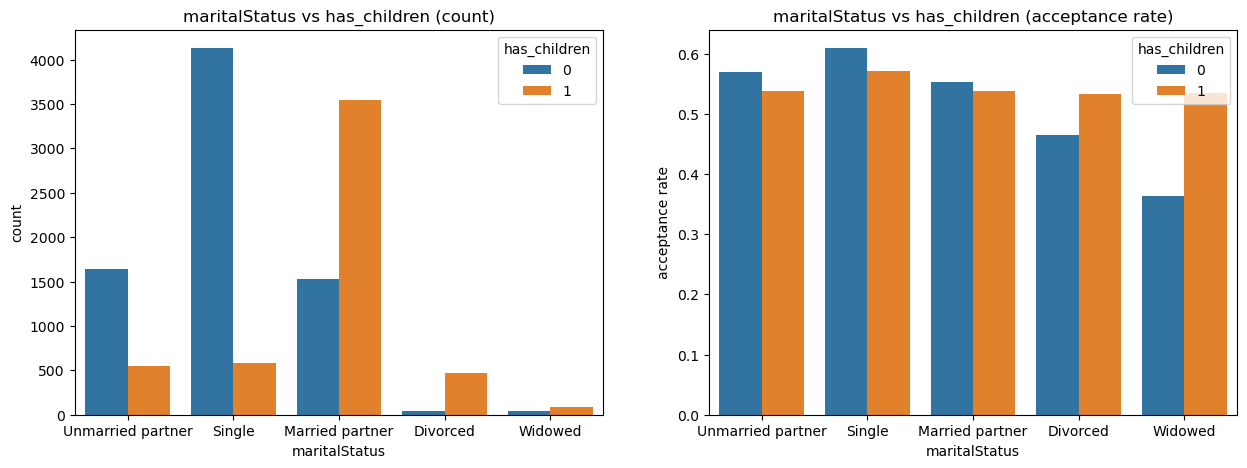

In [69]:
# Visualize count of maritalStatus vs has_children and acceptance rate of maritalStatus vs has_children features
fig10,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x = data['maritalStatus'],hue=data['has_children'],ax=axes[0])
sns.barplot(ax=axes[1], x="maritalStatus", y="Y", hue='has_children', errorbar=None, data=data)
axes[0].set_title('maritalStatus vs has_children (count)')
axes[1].set_title('maritalStatus vs has_children (acceptance rate)')
axes[1].set_ylabel('acceptance rate')

In [70]:
bivariate_analysis('has_children','coupon',data.has_children,data.coupon,4)

,has_children,coupon,TotalCount,Accepted,Rejected,%Accepted,%Rejected
2,1,Carry out & Take away,1012,749,263,74.012,25.988
7,0,Carry out & Take away,1332,971,361,72.898,27.102
5,0,Restaurant(<20),1631,1167,464,71.551,28.449
0,1,Restaurant(<20),1148,800,348,69.686,30.314
1,1,Coffee House,1546,754,792,48.771,51.229
9,0,Restaurant(20-50),838,392,446,46.778,53.222
4,1,Restaurant(20-50),650,265,385,40.769,59.231
3,1,Bar,871,260,611,29.851,70.149


#### Observations:
* Customers with Married partner have at least one kid compared to others.
* Except Divorced and Widowed, all other categories have very similar coupon acceptance rate irrespective of whether they have kids or not.
* Carry out & Take away and Inexpensive Restaurants coupons are more popular among all customers (with and without kids).
* Customers with kids had the highest coupon rejection rate for Bar coupons.

## Final Observations and Conclusion
Based on the univariate, bivariate feature analysis and the plotted visualizations, the following hypothesis can be drawn on the conditions when a customer would or would not generally accept the coupons.

#### Customers would generally accept the coupons if:
* Carry out & Take away or Inexpensive Restaurants (average expense less than $20) coupons are offered
* Coffee House coupons offered to customers who have been to a Coffee House in past a few times (generally 4 or more)
* Coupons with 1 day expiry are offered instead of 2 hour expiry
* Coupons are offered when they aren't going to any Urgent Place
* Carry out & Take away or Inexpensive Restaurants or Coffee House coupons are offered when they are driving with Friend(s) around 6PM in warm weather (Sunny, 80°F)
* Coupons were offered for inexpensive restaurants where they have been in past at least few times (generally 4 or more).
* Carry out & Take away coupon offered in cold weather (Snowy, 30°F)

#### Customers would not generally accept the coupons if:
* Coupons are offered for Expensive Restaurants (average expense between \$20 and \\$50) to customers who have never visited them in past
* Coffee House coupons offered to customers who have never visited them in past
* Bar coupons offered to customers with kid(s)
* Bar and Expensive Restaurant coupons offered to customers in cold weather (Snowy, 30°F) or late night (10PM)
* Any coupons other than Carry Away are offered to customers in cold weather (Snowy, 30°F)
* Bar coupons sent to customers early in the day (7AM, 10AM, 2PM)